In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import spacy

In [3]:
df = pd.read_csv('/home/cneiderer/Downloads/inaug_speeches_mod.csv')

In [4]:
df.head()

,Unnamed: 0,Name,Inaugural Address,Date,text
0,4,George Washington,First Inaugural Address,"Thursday, April 30, 1789",Fellow-Citizens of the Senate and o...
1,5,George Washington,Second Inaugural Address,"Monday, March 4, 1793",Fellow Citizens: I AM again calle...
2,6,John Adams,Inaugural Address,"Saturday, March 4, 1797","WHEN it was first perceived, in ea..."
3,7,Thomas Jefferson,First Inaugural Address,"Wednesday, March 4, 1801",Friends and Fellow-Citizens: CALL...
4,8,Thomas Jefferson,Second Inaugural Address,"Monday, March 4, 1805","PROCEEDING, fellow-citizens, to th..."


In [5]:
from gensim import corpora, models, similarities, matutils
# sklearn
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

In [8]:
docs = list(df.text)
len(docs)

58

In [179]:
nlp = spacy.load('en')

In [181]:
doc = nlp(docs[0])

In [189]:
# Create a CountVectorizer for parsing/counting words
count_vectorizer = CountVectorizer(ngram_range=(1, 3), max_df=0.6,
                                   stop_words='english', token_pattern="\\b[a-z][a-z]+\\b")
count_vectorizer.fit(docs)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.6, max_features=None, min_df=1,
        ngram_range=(1, 3), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='\\b[a-z][a-z]+\\b',
        tokenizer=None, vocabulary=None)

In [190]:
# Create the term-document matrix
# Transpose it so the terms are the rows
counts = count_vectorizer.transform(docs).transpose()

In [191]:
counts.shape

(117031, 58)

In [192]:
# Convert sparse matrix of counts to a gensim corpus
corpus = matutils.Sparse2Corpus(counts)

In [193]:
id2word = dict((v, k) for k, v in count_vectorizer.vocabulary_.items())

In [194]:
len(id2word)

117031

In [195]:
# Create lda model (equivalent to "fit" in sklearn)
lda = models.LdaModel(corpus=corpus, 
                      num_topics=20, 
                      minimum_probability=0.03, 
                      id2word=id2word, passes=10)

In [196]:
# lda.print_topics()

In [197]:
# Transform the docs from the word space to the topic space (like "transform" in sklearn)
lda_corpus = lda[corpus]
lda_corpus

In [198]:
# Store the documents' topic vectors in a list so we can take a peak
lda_docs = [doc for doc in lda_corpus]

In [199]:
# Check out the document vectors in the topic space for the first 5 documents
for pres in zip(df['Name'], df['Date'], lda_docs):
    print(pres)

('George Washington', 'Thursday, April 30, 1789', [(5, 0.99941754)])
('George Washington', 'Monday, March 4, 1793', [(3, 0.99353743)])
('John Adams', 'Saturday, March 4, 1797', [(3, 0.99964869)])
('Thomas Jefferson', 'Wednesday, March 4, 1801', [(12, 0.97659051)])
('Thomas Jefferson', 'Monday, March 4, 1805', [(1, 0.7956844), (5, 0.20395944)])
('James Madison', 'Saturday, March 4, 1809', [(1, 0.16312508), (9, 0.83620477)])
('James Madison', 'Thursday, March 4, 1813', [(3, 0.99932241)])
('James Monroe', 'Tuesday, March 4, 1817', [(3, 0.98434871)])
('James Monroe', 'Monday, March 5, 1821', [(1, 0.9998123)])
('John Quincy Adams', 'Friday, March 4, 1825', [(8, 0.8284089), (9, 0.17133479)])
('Andrew Jackson', 'Wednesday, March 4, 1829', [(1, 0.98257023)])
('Andrew Jackson', 'Monday, March 4, 1833', [(8, 0.99929529)])
('Martin Van Buren', 'Monday, March 4, 1837', [(1, 0.10355859), (18, 0.88956594)])
('William Henry Harrison', 'Thursday, March 4, 1841', [(2, 0.99989843)])
('James Knox Polk', 

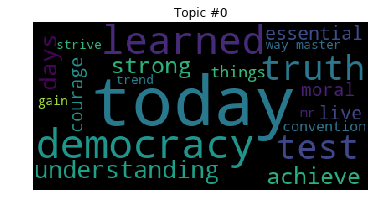

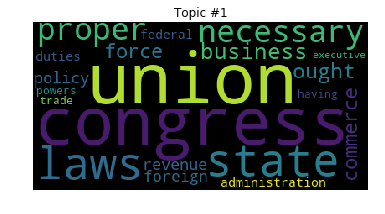

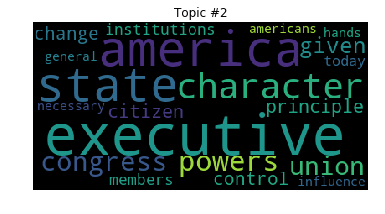

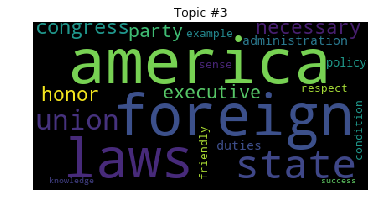

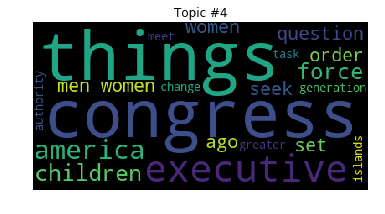

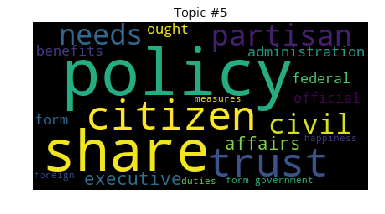

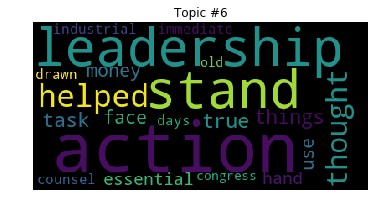

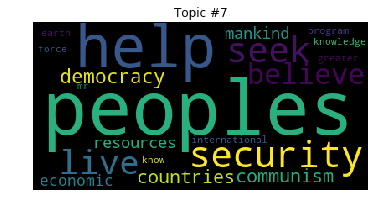

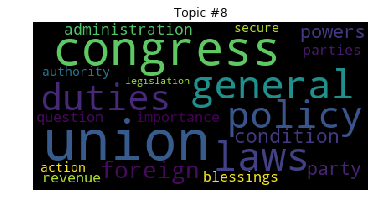

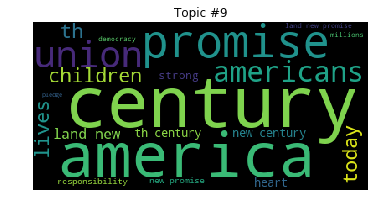

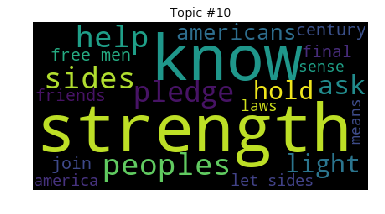

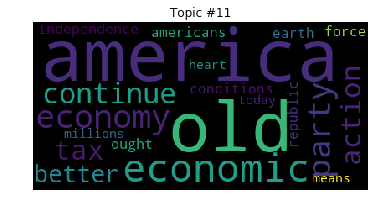

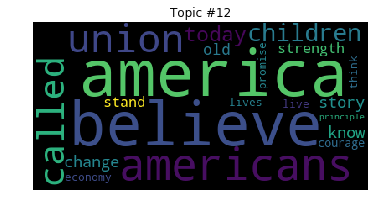

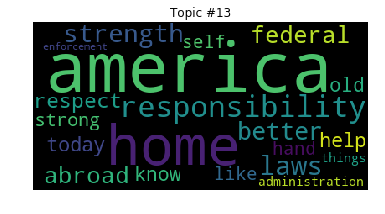

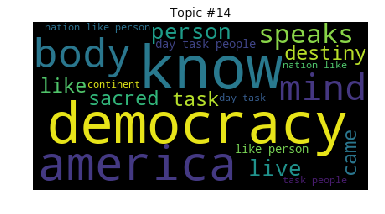

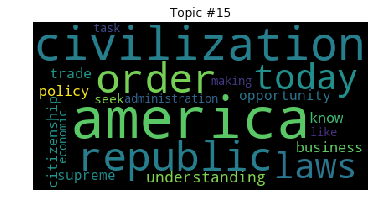

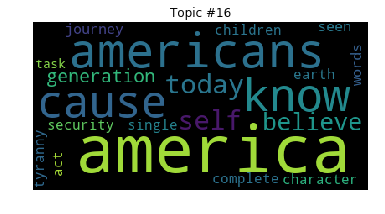

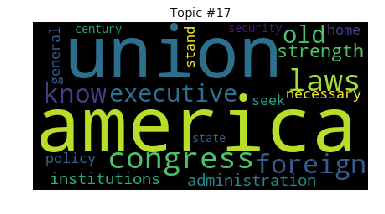

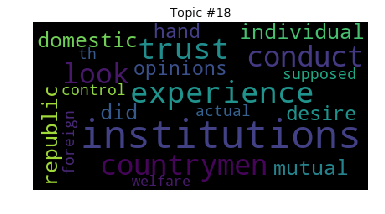

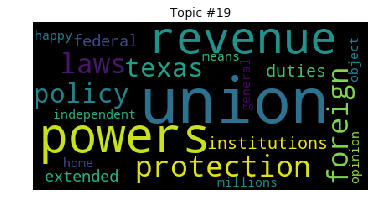

In [210]:
for t in range(lda.num_topics):
    plt.imshow(WordCloud().fit_words(dict(lda.show_topic(t, 20))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()